## <center> CIFAR-10 Image Classification via CNN </center> 
***
This notebook aims to show the basics of building a Machine Learning Model through Image Classification use case. In this example, the CIFAR-10 images dataset and Convolutional Neural Network (CNN) model will be used.

Sections:<a id='sections'></a>

1. [Environment Setup:](#environment_setup) import libraries, load and prepare datasets
2. [Model Implementation:](#model_implementation)

    2.1. [To build CNN model](#build_model)
    
    2.2. [To train CNN model](#train_model)

    2.3. [To test, evaluate & predict CNN model performance](#evaluate_model)
    
3. [Wrap Up:](#wrap_up) Discussion & Closing

<br>
NOTE: The naming/definition of "train", "test", "evaluate" follows how the coding space names the step / define its function.
<br>
<br>

### 1. Environment Setup <a id='environment_setup'></a> 

[Sections](#sections)

In [1]:
# import libraries
import numpy as np
import pandas as pd

import plotly.express as px
import IPython.display as idp
from IPython.display import display, HTML
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

# only rely on "tf" to avoid messing up TensorFlow Keras and Keras
import tensorflow as tf
tf.random.set_seed(0)

from sklearn import metrics
from sklearn.metrics import confusion_matrix
import itertools

import warnings
warnings.filterwarnings("ignore")

In [2]:
# load data
cifar = tf.keras.datasets.cifar10
(x_train, y_train), (x_test, y_test) = cifar.load_data()

In [3]:
# check dataset
print('train inputs shape', x_train.shape)
print('train target shape', y_train.shape)
print('test inputs shape', x_test.shape)
print('test target shape', y_test.shape)

train inputs shape (50000, 32, 32, 3)
train target shape (50000, 1)
test inputs shape (10000, 32, 32, 3)
test target shape (10000, 1)


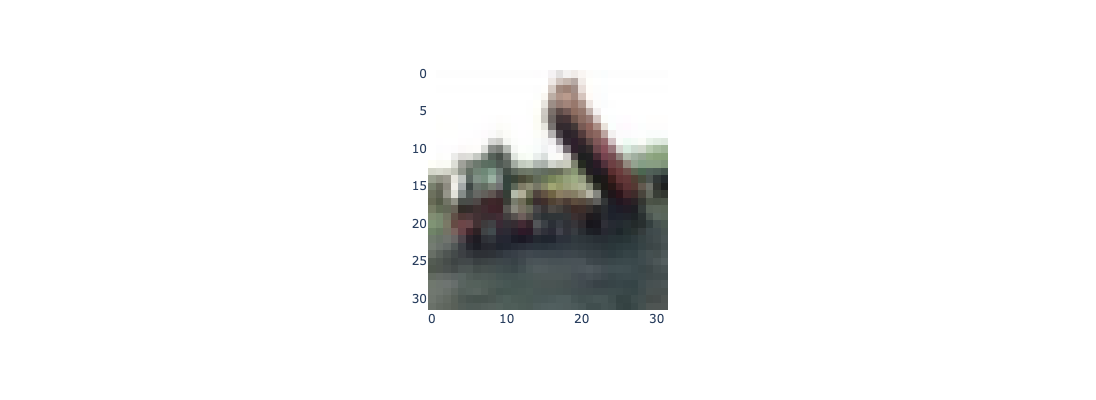

In [4]:
# how each input looks like in terms of an image
img = x_train[2] # image no. 2
fig = px.imshow(img)
fig.update_layout(width=400, height=400)
fig.show()

##### Data Preparation

In [5]:
# Normalize: 0-255 > 0-1 (as TensorFlow only takes in inputs between 0-1)
x_train = x_train/255.0
x_test = x_test/255.0

### 2. Model Implementation<a id='model_implementation'></a> 

[Sections](#sections)

This section serves the core of the entire notebook, where it involves the cycle from designing / configuring CNN internal parameters, training & testing the CNN model, and evaluating the CNN performance.

#### 2.1 To build CNN Model<a id='build_model'></a>

[Sections](#sections)

Before going into the actual coding, the following figure gives the readers a general understanding what CNN architecture this notebook attempts to build. Generally, this notebook intends to build a 2 convolutional with maxpooling layers before sending into the output layer for Image Classification (as presented below).

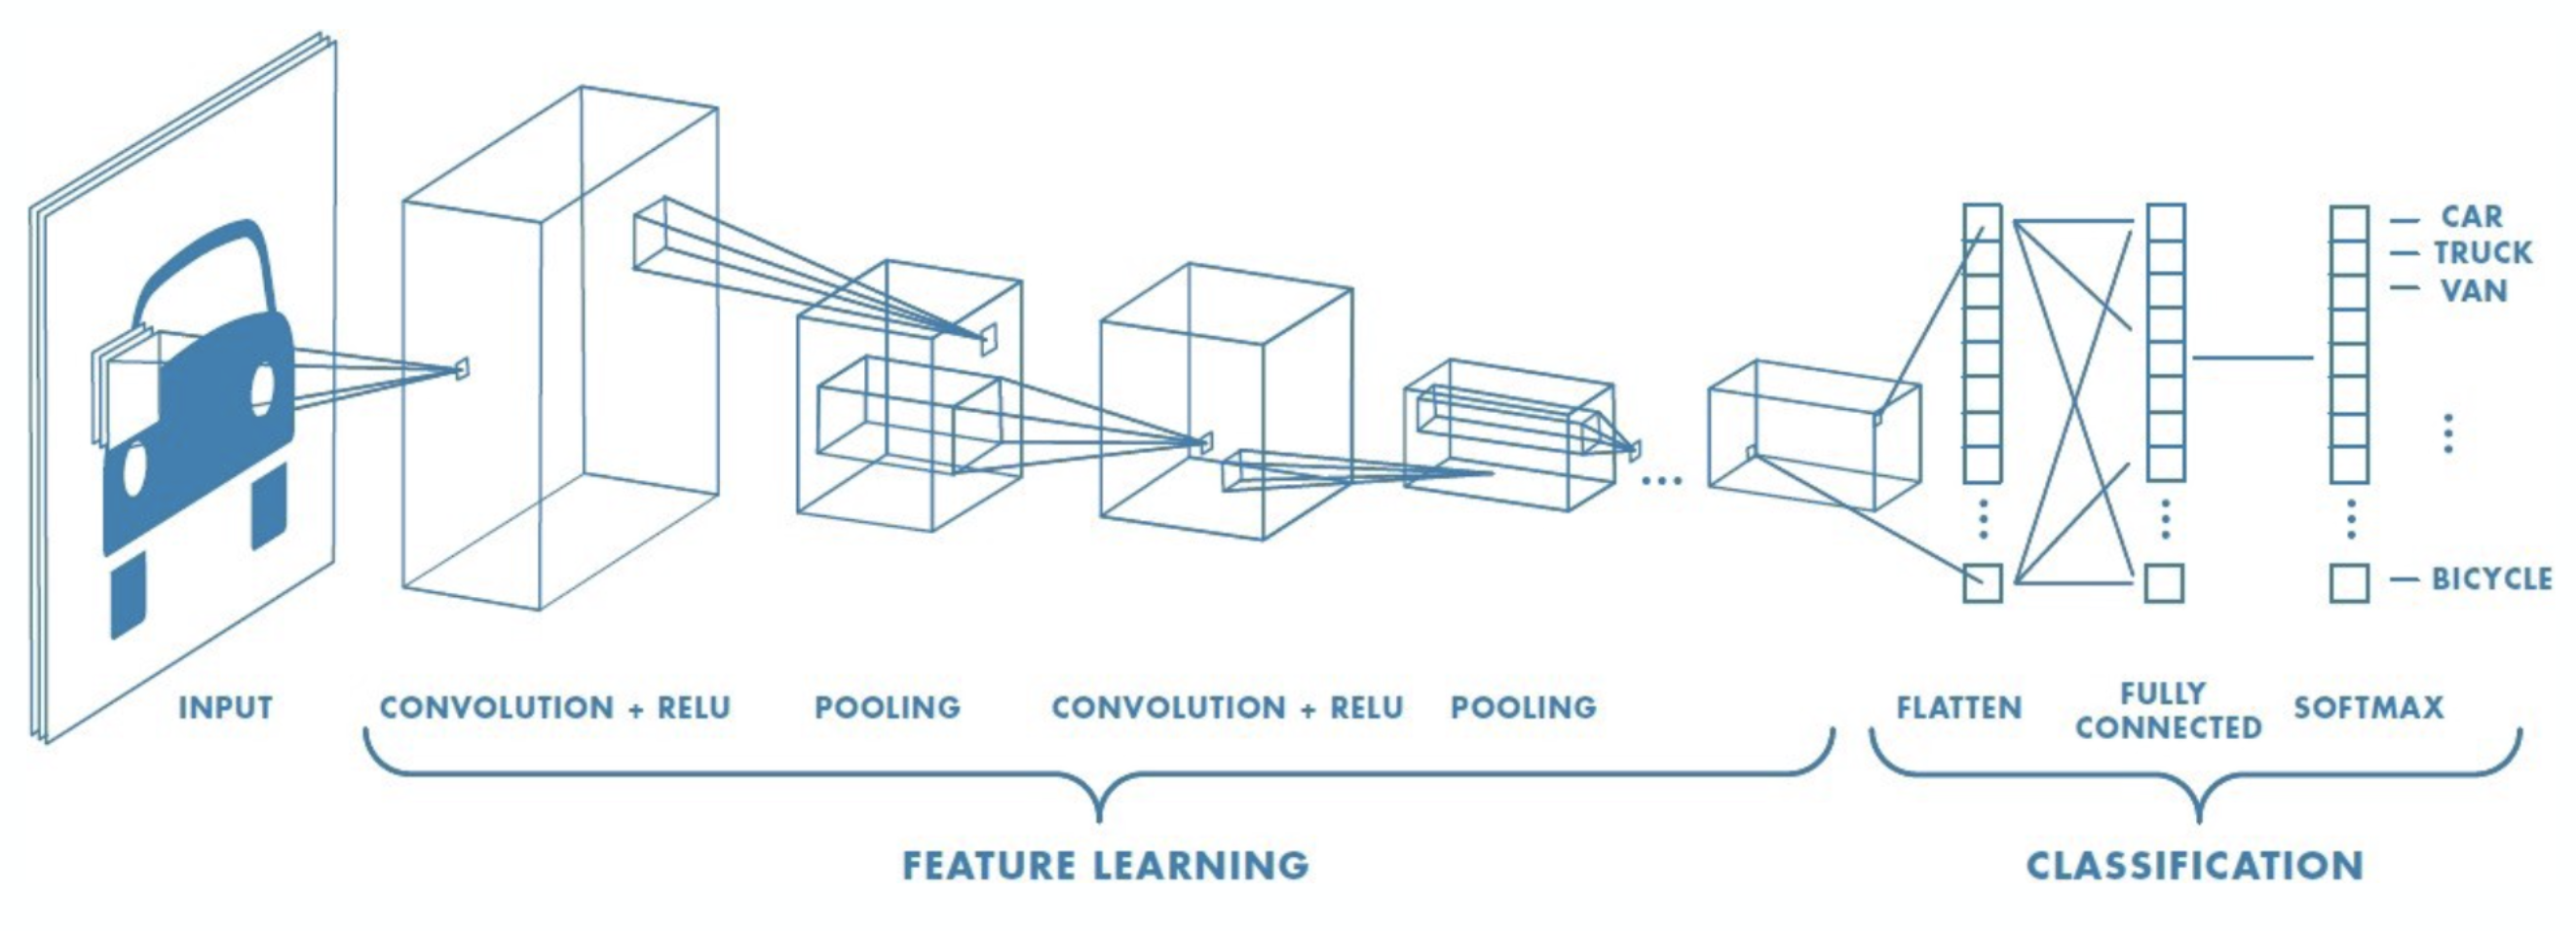

In [6]:
idp.Image(filename='cnn_architecture.png')

##### CNN Model Setup

In [7]:
# declare a model
model = tf.keras.Sequential()

# define "feature learning" components as shown on the figure
model.add(tf.keras.layers.Conv2D(32, kernel_size=(3,3), strides=(1,1), padding='valid', activation='relu', input_shape=(32,32,3)))
model.add(tf.keras.layers.MaxPool2D(pool_size=(2,2)))
model.add(tf.keras.layers.Conv2D(32, activation = 'relu', kernel_size = (3,3)))
model.add(tf.keras.layers.MaxPool2D(pool_size=(2,2)))

# define "classification" components as shown on the figure
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(64, activation='relu'))
model.add(tf.keras.layers.Dense(10, activation='softmax')) # the numbers of class

In [8]:
# check CNN Model Setting
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 30, 30, 32)        896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 13, 13, 32)        9248      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 6, 6, 32)          0         
_________________________________________________________________
flatten (Flatten)            (None, 1152)              0         
_________________________________________________________________
dense (Dense)                (None, 64)                73792     
_________________________________________________________________
dense_1 (Dense)              (None, 10)                6

In [9]:
# define internal parameters
optimizer = tf.keras.optimizers.Adam(lr=0.001)
losses = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)
metrics_acc = ['accuracy']

# compile model
model.compile(optimizer=optimizer, loss=losses, metrics=metrics_acc)

#### 2.2 To train CNN Model<a id='train_model'></a> 

[Sections](#sections)

There are parameters to be set during the training stage. As the explanations could easily be searched from the public source on how and why these parameters are set as it is, this notebook will skip this step. One point that is worth specially brought up is the validation step, which will be included at this layer (as validation once started after finished testing in the past). Also, take note that the epochs is only set as 5 for the demonstration purpose.

In [10]:
# use the train data for model training
history = model.fit(x_train, y_train, epochs=5, batch_size=64, verbose=1, validation_split=0.2)

Epoch 1/5
625/625 [==============================] - 15s 23ms/step - loss: 1.8714 - accuracy: 0.3111 - val_loss: 1.3533 - val_accuracy: 0.5194
Epoch 2/5
625/625 [==============================] - 14s 22ms/step - loss: 1.3170 - accuracy: 0.5338 - val_loss: 1.2157 - val_accuracy: 0.5753
Epoch 3/5
625/625 [==============================] - 13s 20ms/step - loss: 1.1613 - accuracy: 0.5912 - val_loss: 1.1289 - val_accuracy: 0.6092
Epoch 4/5
625/625 [==============================] - 13s 21ms/step - loss: 1.0634 - accuracy: 0.6271 - val_loss: 1.0594 - val_accuracy: 0.6325
Epoch 5/5
625/625 [==============================] - 13s 21ms/step - loss: 0.9960 - accuracy: 0.6524 - val_loss: 1.0539 - val_accuracy: 0.6354


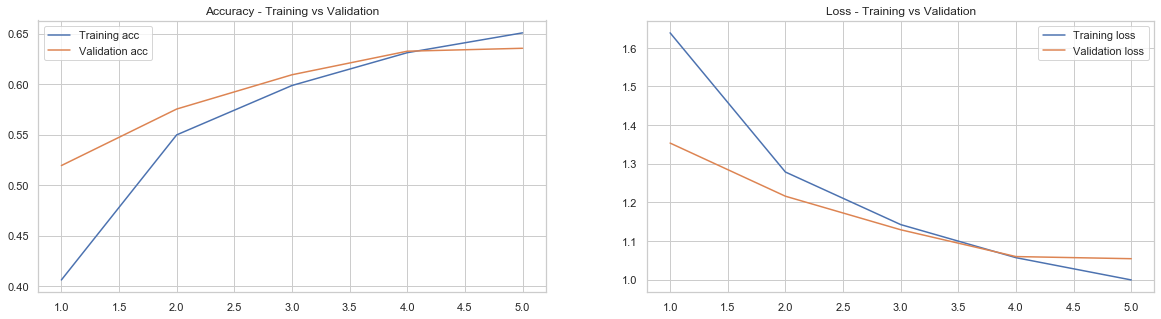

In [11]:
# check train and validation: loss & accuacy
sns.set(style="whitegrid")

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

fig, ax = plt.subplots(1, 2, figsize=(20, 5))
sns.lineplot(ax=ax[0], x=epochs, y=acc, label='Training acc')
sns.lineplot(ax=ax[0], x=epochs, y=val_acc, label='Validation acc')
ax[0].set_title("Accuracy - Training vs Validation")

sns.lineplot(ax=ax[1], x=epochs, y=loss, label='Training loss')
sns.lineplot(ax=ax[1], x=epochs, y=val_loss, label='Validation loss')
ax[1].set_title("Loss - Training vs Validation");

##### Result Interpretation (history) & Thoughts Sharing

Based on the settings on the training stage, the result will return 4 types of metrics: train loss & accuracy and validation loss & accuracy. Theoretically, as the higher the epochs setting, the accuracy will increase and the loss will then decrease; yet, the calculation will come to a stage where the result will not get any significant improvement but stays, and will never touched zero (which is another huge topic, but for more info why not. touching zero could start with the concept of [Limit](https://en.wikipedia.org/wiki/Limit_(mathematics)). Certainly, there are many more than just tuning the epoch, but as one of the core concepts in Machine Learning is about finding the "weight" through "keep searching", which "epoch" can achieve this concept technically; therefore, "epoch" is always one of the first parameters to think of.  

Generally, the figures above give an overview of the CNN model performance (at the training stage). As the settings only run for 5 epochs, the x-axis of the graph shows only 5 iterations and y-axis tells how the accuracy increase and the loss decrease at each epoch, and the result indicates improvement so far. Whether 65% (approx.) accuracy is a statisfied number it depends on the context, but with such a cleaned dataset (CIFAR-10) in this case, the result can be better. On top of this, the concerns of overfitting and underfitting will also be considered. To simplify explanation, the rule of thumb is the validation loss should be slightly higher than or around training loss; if the difference between the 2 losses is "too much", it indicates overfiting (e.g. train loss > val loss) or underfiting (e.g. train loss < val loss).

#### 2.3 To test, evaluate & predict CNN model performance<a id='evaluate_model'></a> 

[Sections](#sections)

In this section, this notebook presents different methods to assess the CNN model performance. The methods of assessing the ML performance include: using unseen dataset, Confusion Matrix, and Human Checking. 

##### Model Evalution - Test Data (unseen dataset)

In [12]:
# use the test data for model evaluation
results = model.evaluate(x_test, y_test, batch_size=64, verbose=1)

157/157 [==============================] - 1s 4ms/step - loss: 1.0542 - accuracy: 0.6357


In [13]:
print("test loss: ", results[0])
print("test acc: ", results[1])

test loss:  1.0542324781417847
test acc:  0.635699987411499


##### Model Evalution - Confusion Matrix

In [14]:
# define label name for visualization purpose
label_name = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

In [15]:
# define function to plot confusion matrix
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.YlGn):
    
    plt.rcParams['figure.figsize'] = [12,8]
    plt.rcParams['axes.grid'] = False

    plt.imshow(cm, interpolation='nearest', cmap=cmap, aspect='auto')
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, label_name, rotation=30)
    plt.yticks(tick_marks, label_name)
    
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt), horizontalalignment="center", color="white" if cm[i, j] > thresh else "black")
    
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.margins(0.1)
    plt.show()

In [16]:
# One hot encode the outcome
num_classes = 10
y_train_tf = tf.keras.utils.to_categorical(y_train, num_classes)
y_test_tf = tf.keras.utils.to_categorical(y_test, num_classes)

cnn_pred_mnist = model.predict(x_test)
cnn_pred_mnist = np.argmax(cnn_pred_mnist, axis=1)
y_true = np.argmax(y_test_tf,axis=1)

cnn_f1_mnist = metrics.f1_score(y_true, cnn_pred_mnist, average= "weighted")
cnn_accuracy_mnist = metrics.accuracy_score(y_true, cnn_pred_mnist)
cnn_cm_mnist = metrics.confusion_matrix(y_true, cnn_pred_mnist)

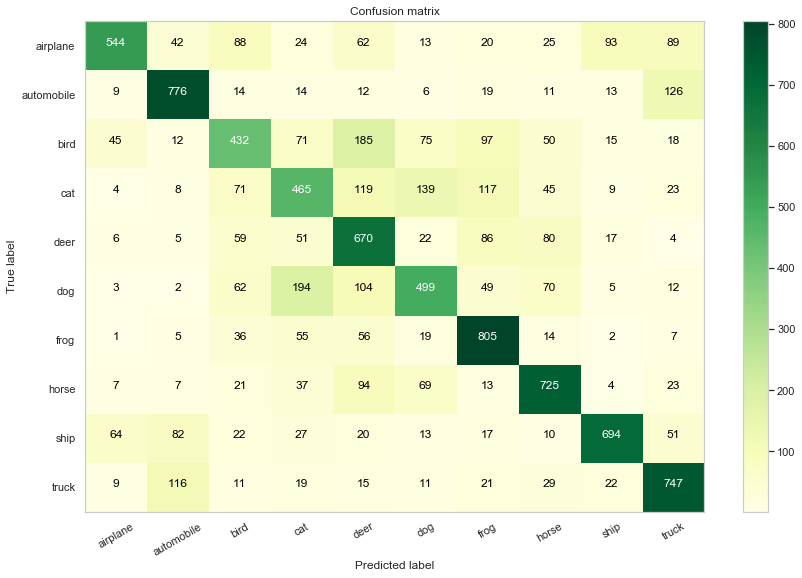

In [17]:
# quick view on Confusion Matrix
plot_confusion_matrix(cnn_cm_mnist, label_name)

In [18]:
print('\n')
print("F1 score: {}".format(cnn_f1_mnist))
print("Accuracy score: {}".format(cnn_accuracy_mnist))
print('\n')
print(metrics.classification_report(y_true, cnn_pred_mnist))



F1 score: 0.6331248208459261
Accuracy score: 0.6357


              precision    recall  f1-score   support

           0       0.79      0.54      0.64      1000
           1       0.74      0.78      0.76      1000
           2       0.53      0.43      0.48      1000
           3       0.49      0.47      0.48      1000
           4       0.50      0.67      0.57      1000
           5       0.58      0.50      0.53      1000
           6       0.65      0.81      0.72      1000
           7       0.68      0.72      0.70      1000
           8       0.79      0.69      0.74      1000
           9       0.68      0.75      0.71      1000

    accuracy                           0.64     10000
   macro avg       0.64      0.64      0.63     10000
weighted avg       0.64      0.64      0.63     10000



##### Result Interpretation (Confusion Matrix, F1 Score, & Accuracy) & Thoughts Sharing

Confusion Matrix (presented as heatmap) describes the performance of a model in classification problem, through counting each predicted label that are generated by the algorithm after training, against its "True label" (the actual label). Looking at the diagonal elements from the heatmap above, it generally shows a darker green across the diagonal elements that means the algorithm predicts generally well. However, the info of Confusion Matrix would be much helpful if it further summarised into metrics evaluations such as Precision, Recall or F1 Score and others, which quantitatively gives a better idea on how a Model performs. 

Regardless how clean the dataset is or how well the algo is trained or both, several metrics must be used to analyse together in order to help understanding if the result is "skewed" due to an imbalance dataset (incl. random split dataset); if this is the case, one of the clues is F1 Score (0.633) should show a large vary from Accuracy (0.636). Though Accuracy or F1 Score is a summary of Precision and Recall, both metrics do bring out different insights, for example, precision with 0.79 (row=0) tells that approx. 79% of the time the algorithm will return more relevant than irrelevant results (2 conditions, comparison) for that class; while 0.54 from its recall says that 54% of the returned results are relevant (1 condition) for that class. 
<br>
<br>

##### Model Evaluation - Human Checking (Plot image vs Predicted class)
Only 1 sample of the test lists that were used for model prediction above will be included in the following dataframe. The main objective is purely for comparison purpose: Predicted Class vs Plot Image. **Result Intepretation** : the highest probability will be the predicted class.

In [19]:
# predicts probabilities for each class
img_st = 1
img_end = 5
pred_img = model.predict(x_test[img_st:img_end])
table_predicted_prob = pd.DataFrame(zip(label_name, pred_img[0]), columns=['Label','Predicted Prob'])
display(HTML(table_predicted_prob.style.highlight_max(subset=['Predicted Prob']).render()))



The Plot Image is labelled as:  ship


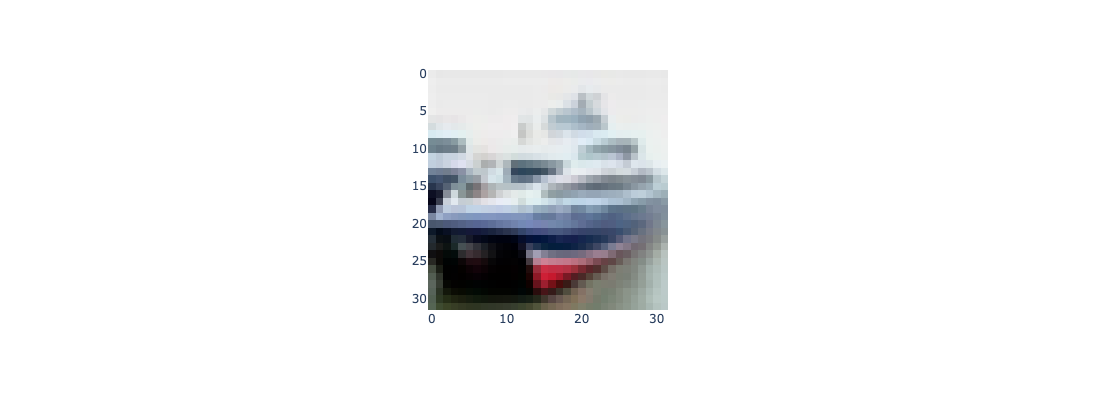

In [20]:
print('\n\nThe Plot Image is labelled as: ', label_name[y_test[img_st][0]])
fig = px.imshow(x_test[img_st])
fig.update_layout(width=400, height=400)
fig.show()

#### 3. Wrap Up<a id='wrap_up'></a> 

[Sections](#sections)

**Discussion & Closing:**

Certainly, the actual process of building a Machine Learning model is far much more complex than what is presented on this notebook. For instance, different pooling methods could be applied in order to enhance the CNN model performance. Alternatively, could dropout method be added to test if the result is improved. There are many parameters could play important roles in order to build a robust Machine Learning solution, which often will lead into very deep in from missing values handling, feature representation, model selections, hyperparameters fine-tuning, to modern technologies. Having said that, the key cycle of developing a ML model generally repeats, which is the main idea of this presentation. 

To sum up, the objective of this notebook is to demo the basic steps from building, training to evaluating a Machine Learning model through the Image Classification example. Hopefully, this brief presentation gives you some ideas on my skill sets in general. Once again, thank you for considering me.